In [1]:
# Загрузка данных

from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [2]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data.csv', encoding='latin1')

In [4]:
# Информация о данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Видим, что колонки, связанные с датой (Order Date, Ship Date) имеют тип object. Необходимо изменить тип данных для указанных колонок.

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['ship_month'] = df['Ship Date'].dt.month
df['ship_year'] = df['Ship Date'].dt.year

In [6]:
# Посмотрим, что получилось

df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,ship_month,ship_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,10,2015


Для удобства обращения к колонкам переименуем их на аналогичные, но заменим заглавную букву на строчную и пробел изменим на нижнее подчеркивание.

In [7]:
# Выведем списком названия колонок

df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'order_month', 'order_year', 'ship_month', 'ship_year'],
      dtype='object')

In [8]:
# Переименование колонок

df = df.rename(
    columns= {"Row ID": "row_id",
              "Order ID": "order_id",
              "Order Date": "order_date",
              "Ship Date": "ship_date",
              "Ship Mode": "ship_mode",
              "Customer ID": "customer_id",
              "Customer Name": "customer_name",
              "Segment": "segment",
              "Country": "country",
              "City": "city",
              "State": "state",
              "Postal Code": "postal_code",
              "Region": "region",
              "Product ID": "product_id",
              "Category": "category",
              "Sub-Category": "sub-category",
              "Product Name": "product_name",
              "Sales": "sales",
              "Quantity": "quantity",
              "Discount": "discount",
              "Profit": "profit"}
)

# Проверим все ли изменилось
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sub-category,product_name,sales,quantity,discount,profit,order_month,order_year,ship_month,ship_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,11,2016


In [9]:
# Описательная статистика по числовым колонкам

df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit,order_month,order_year,ship_month,ship_year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233,7.743146,2015.737442
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000,1.000000,2014.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000,5.000000,2015.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000,9.000000,2016.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000,11.000000,2017.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000,12.000000,2018.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555,3.340476,1.126141


In [10]:
# Посмотрим, в какой категории было больше всего покупок

df.value_counts('category')

,count
category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [11]:
# Сгруппируем продажи и прибыль по месяцам

monthly_profit = df.groupby('order_month').sum('profit').reset_index()

In [12]:
# Определим топ-3 месяца по прибыли

monthly_profit.sort_values(by='profit', ascending=False).head(3)

,order_month,row_id,postal_code,sales,quantity,discount,profit,order_year,ship_month,ship_year
11,12,6921486,81197760,325293.5035,5419,211.81,43369.1919,2838118,15224,2838270
8,9,6999355,74128939,307649.9457,5062,206.06,36857.4753,2787758,12575,2787758
10,11,7326406,80525816,352461.0710,5775,232.87,35468.4265,2965035,16332,2965035


Наибольшая прибыль была в декабре, сентябре и ноябре

In [13]:
# Рассчитаем основные метрики

print(f"Общая выручка: ${df['sales'].sum():,.2f}")
print(f"Общая прибыль: ${df['profit'].sum():,.2f}")
print(f"Средняя прибыльность: {(df['profit'].sum() / df['sales'].sum() * 100):.2f}%")

Общая выручка: $2,297,200.86
Общая прибыль: $286,397.02
Средняя прибыльность: 12.47%


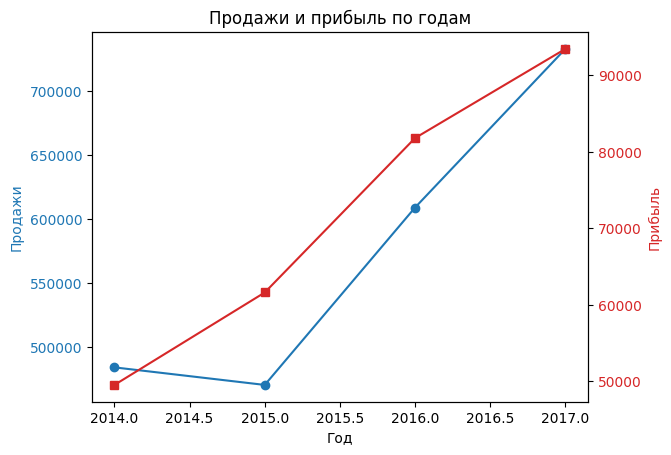

In [14]:
annual = df.groupby('order_year').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Год')
ax1.set_ylabel('Продажи', color=color)
ax1.plot(annual['order_year'], annual['sales'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Прибыль', color=color)
ax2.plot(annual['order_year'], annual['profit'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Продажи и прибыль по годам')
plt.show()

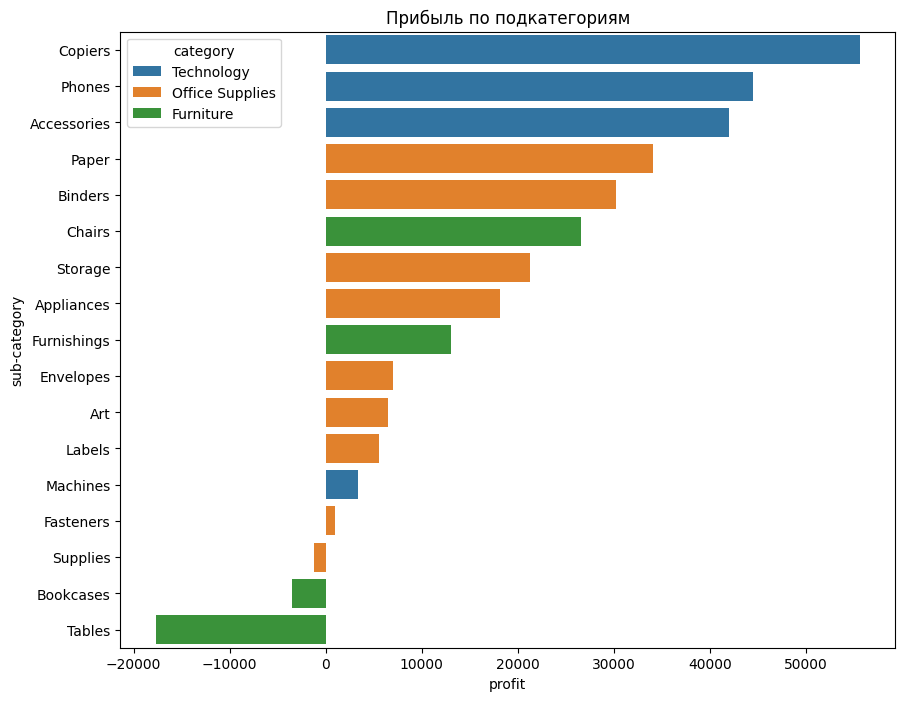

In [15]:
profit_by_cat = df.groupby(['category', 'sub-category'])['profit'].sum().reset_index()
profit_by_cat = profit_by_cat.sort_values('profit', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=profit_by_cat, y='sub-category', x='profit', hue='category', dodge=False)
plt.title('Прибыль по подкатегориям')
plt.show()

Категория "Technology" даёт наибольшую прибыль.

Подкатегория "Tables" приносит убытки — стоит пересмотреть ценообразование или поставщика.

/tmp/ipython-input-2836316341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=losses.values, y=losses.index, palette='Reds_r')


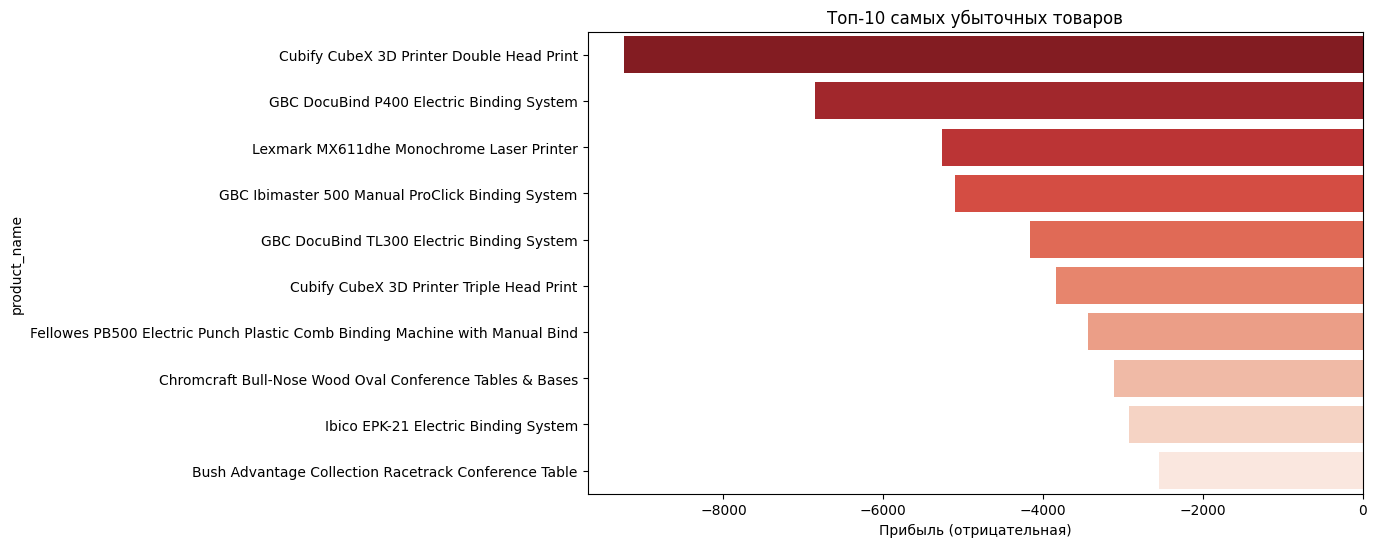

In [16]:
losses = df[df['profit'] < 0].groupby('product_name')['profit'].sum().sort_values().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=losses.values, y=losses.index, palette='Reds_r')
plt.title('Топ-10 самых убыточных товаров')
plt.xlabel('Прибыль (отрицательная)')
plt.show()

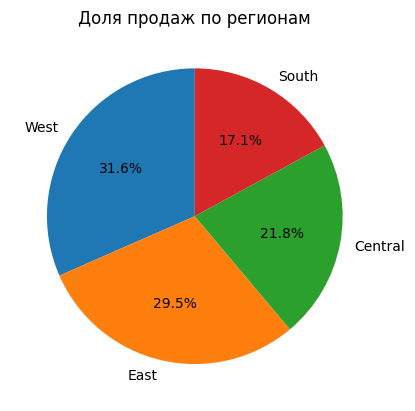

In [17]:
# Продажи по регионам

region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure()
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доля продаж по регионам')
plt.ylabel('')
plt.show()

In [18]:
# Сегментация клиентов

segment_perf = df.groupby('segment').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'nunique'
}).rename(columns={'order_id': 'orders'})

print(segment_perf)

                    sales       profit  orders
segment                                       
Consumer     1.161401e+06  134119.2092    2586
Corporate    7.061464e+05   91979.1340    1514
Home Office  4.296531e+05   60298.6785     909


Сегмент "Consumer" — самый активный, но "Corporate" приносит больше прибыли на заказ.